In [1]:
# importing module
import sys
import os
from pathlib import Path
sys.path.append(str(Path.cwd().parent))
from myutils import *
from SLBQP import SLBQP
from datastorer import DataStorer
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import time
plt.style.use('seaborn')
params = {
    'figure.figsize': (20, 10),
    'legend.fontsize': 'x-large',
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
    'axes.titlesize': 'x-large',
}
plt.rcParams.update(params)

# Utility Functions

In [2]:
def load_runs(folder, size, algorithm, nproblems, measurement="val"):
    """
    TODO: COMMENT
    """
    if not folder.endswith("/"):
        folder += "/"
    algorithm = "ROS" if algorithm.lower().startswith("r") else "GOLD"
    path = f"{folder}{size}/{algorithm}"
    val_list = []
    for i in range(nproblems):
        filepath = f"{path}/{i}.csv"
        val = pd.read_csv(filepath, usecols=[measurement]).to_numpy()
        val_list.append(val)
    return np.array(val_list)

def load_external_solver_values(folder, size, filename="optimal_values.txt"):
    """
    TODO: COMMENT
    """
    if not folder.endswith("/"):
        folder += "/"
    path = f"{folder}{size}/{filename}"
    
    with open(path, "r") as f:
        opt_vals = f.readlines()
        opt_vals = [np.float64(x.strip()) for x in opt_vals]
        return np.array(opt_vals)

def load_alpha_runs(folder, nproblems):
    """
    
    """
    if not folder.endswith("/"):
        folder += "/"
    
    alpha_values = []
    for i in range(nproblems):
        path = f"{folder}{i}.csv"
        av = pd.read_csv(path, usecols=["val"]).to_numpy()
        alpha_values.append(av)
    return np.array(alpha_values)

def load_external_solver_alphas(folder, filename="optimal_values.txt"):
    """
    TODO: COMMENT
    """
    if not folder.endswith("/"):
        folder += "/"
    
    path = f"{folder}{filename}"
    with open(path, "r") as f:
        opt_vals = f.readlines()
        opt_vals = [np.float64(x.strip()) for x in opt_vals]
        return np.array(opt_vals)

In [44]:
def relative_gap(val, opt):
    """
    TODO: COMMENT
    """
    diff = val - opt
    assert(all(diff > 0))
    return diff / np.abs(opt) if abs(opt) > 1e-3 else diff

In [4]:
def convergence_rate(values, optimal_values):
    """
    TODO: COMMENT
    """
    tmp = values - optimal_values
    res = []
    for l in tmp:
        res.append(l[1:] / l[:-1])
    return np.array(res)

# PATHS

In [5]:
rootfolders = "C1EPS_001,C1EPS_01,C_01EPS01,C_05EPS01,C_1EPS01,C_2EPS01,C1EPS_1,C_5EPS01,C_10EPS01".split(",")
rootdataset = "AIRF CAL ML".split(" ")
problem_sizes = [300,400,500, 600]
epsilons = [x for x in rootfolders if "EPS_" in x]
upperbounds = [x for x in rootfolders if "C_" in x]

# ML - UPPERBOUNDS

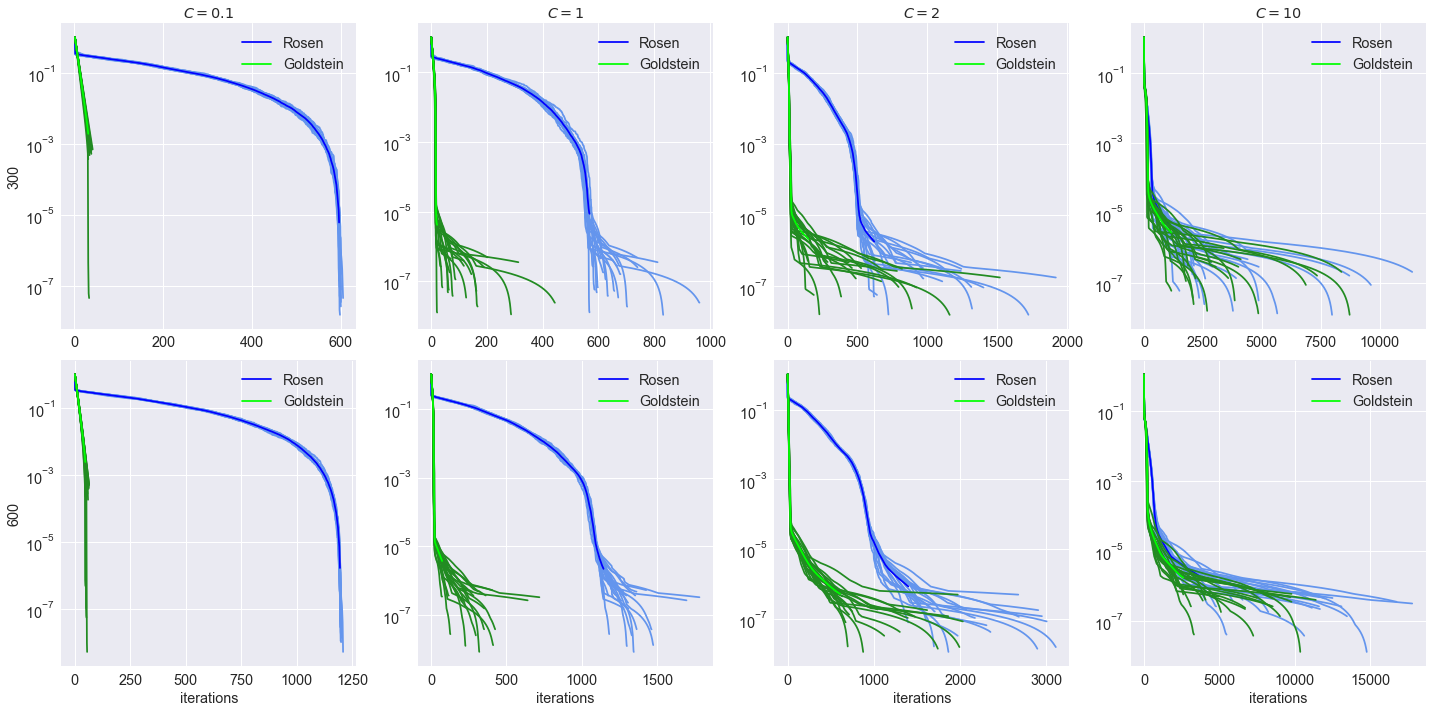

In [6]:
chosen_uppers = ['C_01EPS01', 'C_1EPS01', 'C_2EPS01', 'C_10EPS01']
chosen_sizes = [300,600]

fig, axs = plt.subplots(nrows=len(chosen_sizes), ncols=len(chosen_uppers), figsize=(20,10))
for i,root in enumerate(chosen_uppers):
    for j,size in enumerate(chosen_sizes):
        ax = axs[j][i]        
        values_rosen = load_runs(f"./RUNS/ML/{root}", size, "rosen", nproblems=20)
        values_goldstein =  load_runs(f"./RUNS/ML/{root}", size, "gold", nproblems=20)
        
        best_values = load_external_solver_values(f"./RUNS/ML/{root}", size)
        
        values_rosen = [relative_gap(i, opt) for i, opt in zip(values_rosen, best_values)]
        values_goldstein = [relative_gap(i, opt) for i, opt in zip(values_goldstein, best_values)]
        
        plot_multiple_functions(values_rosen, plot_avg=True, ax=ax, label="Rosen")
        plot_multiple_functions(values_goldstein, plot_avg=True, ax=ax, color='forestgreen', col_avg='lime', label="Goldstein")
        ax.set_yscale("log")

        
for ax, size in zip(axs[:,0], chosen_sizes):
    ax.set_ylabel(str(size))
    
for ax, c in zip(axs[0], [0.1, 1, 2, 10]):
    ax.set_title(f"$C = {c}$")

for ax in axs[1]:
    ax.set_xlabel("iterations")

plt.tight_layout()

# AIRFOIL - Upperbounds

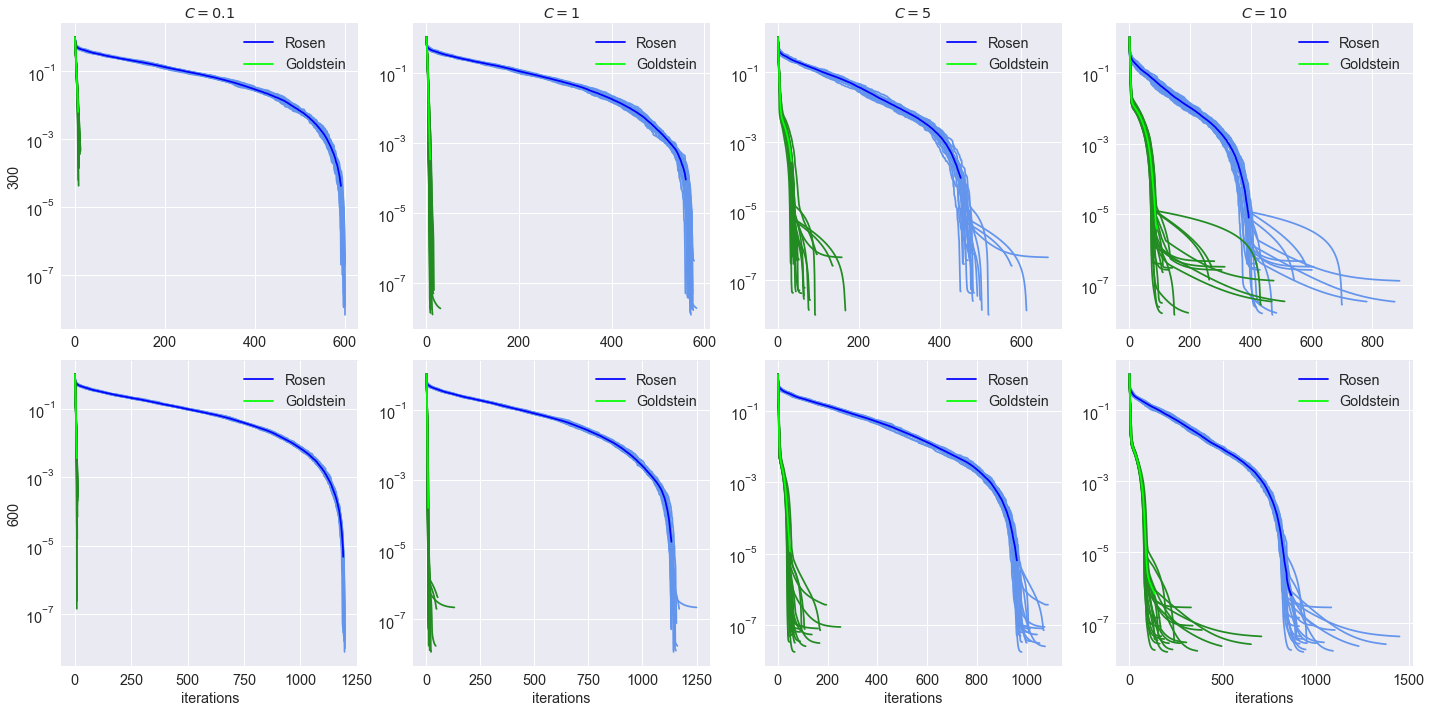

In [7]:
chosen_uppers = ['C_01EPS01', 'C_1EPS01', 'C_5EPS01', 'C_10EPS01']
chosen_sizes = [300,600]

fig, axs = plt.subplots(nrows=len(chosen_sizes), ncols=len(chosen_uppers), figsize=(20,10))
for i,root in enumerate(chosen_uppers):
    for j,size in enumerate(chosen_sizes):
        ax = axs[j][i]        
        values_rosen = load_runs(f"./RUNS/AIRF/{root}", size, "rosen", nproblems=20)
        values_goldstein =  load_runs(f"./RUNS/AIRF/{root}", size, "gold", nproblems=20)
        
        best_values = load_external_solver_values(f"./RUNS/AIRF/{root}", size)
        
        values_rosen = [relative_gap(i, opt) for i, opt in zip(values_rosen, best_values)]
        values_goldstein = [relative_gap(i, opt) for i, opt in zip(values_goldstein, best_values)]
        
        plot_multiple_functions(values_rosen, plot_avg=True, ax=ax, label="Rosen")
        plot_multiple_functions(values_goldstein, plot_avg=True, ax=ax, color='forestgreen', col_avg='lime', label="Goldstein")
        ax.set_yscale("log")

        
for ax, size in zip(axs[:,0], chosen_sizes):
    ax.set_ylabel(str(size))
    
for ax, c in zip(axs[0], [0.1, 1, 5, 10]):
    ax.set_title(f"$C = {c}$")

for ax in axs[1]:
    ax.set_xlabel("iterations")

plt.tight_layout()

# CALIFORNIA HOUSING - UPPERBOUNDS

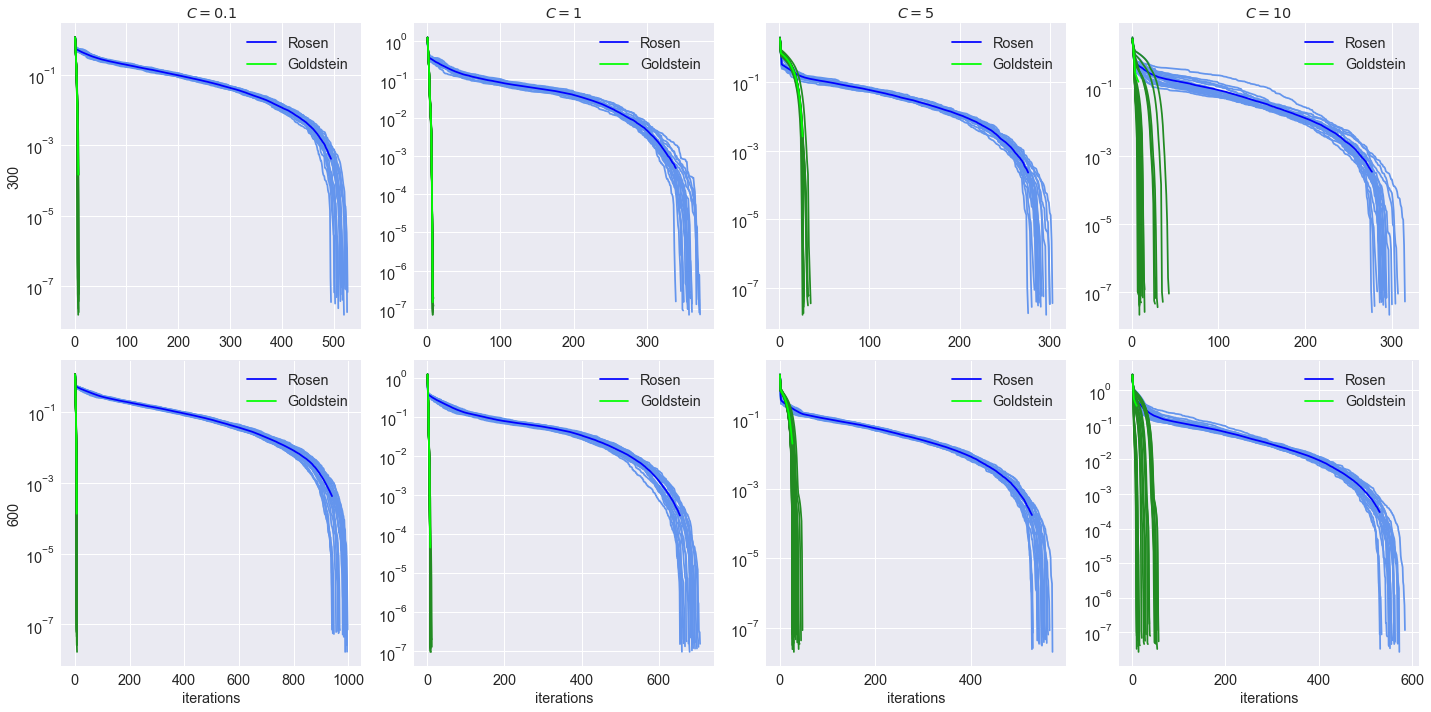

In [8]:
chosen_uppers = ['C_01EPS01', 'C_1EPS01', 'C_5EPS01', 'C_10EPS01']
chosen_sizes = [300, 600]

fig, axs = plt.subplots(nrows=len(chosen_sizes), ncols=len(chosen_uppers), figsize=(20,10))
for i,root in enumerate(chosen_uppers):
    for j,size in enumerate(chosen_sizes):
        ax = axs[j][i]        
        values_rosen = load_runs(f"./RUNS/CAL/{root}", size, "rosen", nproblems=20)
        values_goldstein =  load_runs(f"./RUNS/CAL/{root}", size, "gold", nproblems=20)
        
        best_values = load_external_solver_values(f"./RUNS/CAL/{root}", size)
        
        values_rosen = [relative_gap(i, opt) for i, opt in zip(values_rosen, best_values)]
        values_goldstein = [relative_gap(i, opt) for i, opt in zip(values_goldstein, best_values)]
        
        plot_multiple_functions(values_rosen, plot_avg=True, ax=ax, label="Rosen")
        plot_multiple_functions(values_goldstein, plot_avg=True, ax=ax, color='forestgreen', col_avg='lime', label="Goldstein")
        ax.set_yscale("log")

        
for ax, size in zip(axs[:,0], chosen_sizes):
    ax.set_ylabel(str(size))
    
for ax, c in zip(axs[0], [0.1, 1, 5, 10]):
    ax.set_title(f"$C = {c}$")

for ax in axs[1]:
    ax.set_xlabel("iterations")

plt.tight_layout()

# ML - $\epsilon$

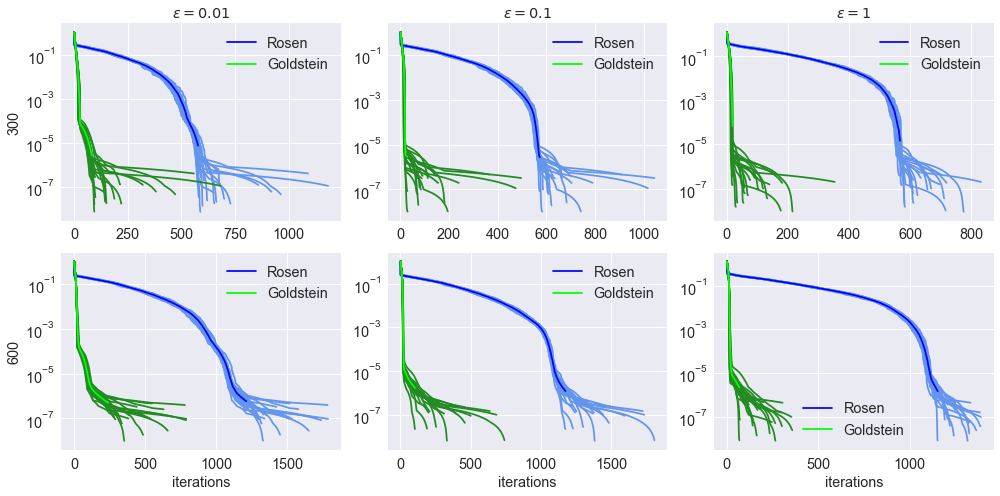

In [9]:
chosen_epsilons = epsilons
chosen_sizes = [300, 600]

fig, axs = plt.subplots(nrows=len(chosen_sizes), ncols=len(chosen_epsilons), figsize=(14,7))
for i,root in enumerate(chosen_epsilons):
    for j,size in enumerate(chosen_sizes):
        ax = axs[j][i]
        
        values_rosen = load_runs(f"./RUNS/ML/{root}", size, "rosen", nproblems=20)
        values_goldstein =  load_runs(f"./RUNS/ML/{root}", size, "gold", nproblems=20)
   
        best_values = load_external_solver_values(f"./RUNS/ML/{root}", size)
        
        values_rosen = [relative_gap(i, opt) for i, opt in zip(values_rosen, best_values)]
        values_goldstein = [relative_gap(i, opt) for i, opt in zip(values_goldstein, best_values)]
        
        plot_multiple_functions(values_rosen, plot_avg=True, ax=ax, label="Rosen")
        plot_multiple_functions(values_goldstein, plot_avg=True, ax=ax, color='forestgreen', col_avg='lime', label="Goldstein")
        ax.set_yscale("log")

        
for ax, size in zip(axs[:,0], chosen_sizes):
    ax.set_ylabel(str(size))
    
for ax, eps in zip(axs[0], [0.01, 0.1, 1]):
    ax.set_title(f"$\epsilon = {eps}$")

for ax in axs[1]:
    ax.set_xlabel("iterations")

plt.tight_layout()

# AIRFOIL - $\epsilon$

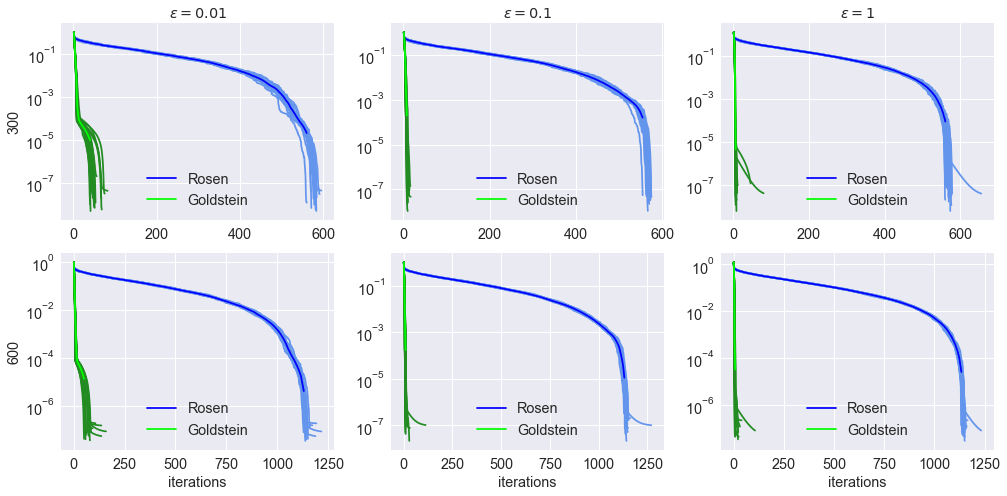

In [10]:
chosen_epsilons = epsilons
chosen_sizes = [300, 600]

fig, axs = plt.subplots(nrows=len(chosen_sizes), ncols=len(chosen_epsilons), figsize=(14,7))
for i,root in enumerate(chosen_epsilons):
    for j,size in enumerate(chosen_sizes):
        ax = axs[j][i]
        
        values_rosen = load_runs(f"./RUNS/AIRF/{root}", size, "rosen", nproblems=20)
        values_goldstein =  load_runs(f"./RUNS/AIRF/{root}", size, "gold", nproblems=20)
   
        best_values = load_external_solver_values(f"./RUNS/AIRF/{root}", size)
        
        values_rosen = [relative_gap(i, opt) for i, opt in zip(values_rosen, best_values)]
        values_goldstein = [relative_gap(i, opt) for i, opt in zip(values_goldstein, best_values)]
        
        plot_multiple_functions(values_rosen, plot_avg=True, ax=ax, label="Rosen")
        plot_multiple_functions(values_goldstein, plot_avg=True, ax=ax, color='forestgreen', col_avg='lime', label="Goldstein")
        ax.set_yscale("log")

        
for ax, size in zip(axs[:,0], chosen_sizes):
    ax.set_ylabel(str(size))
    
for ax, eps in zip(axs[0], [0.01, 0.1, 1]):
    ax.set_title(f"$\epsilon = {eps}$")

for ax in axs[1]:
    ax.set_xlabel("iterations")

plt.tight_layout()

# CALIFORNIA - $\epsilon$

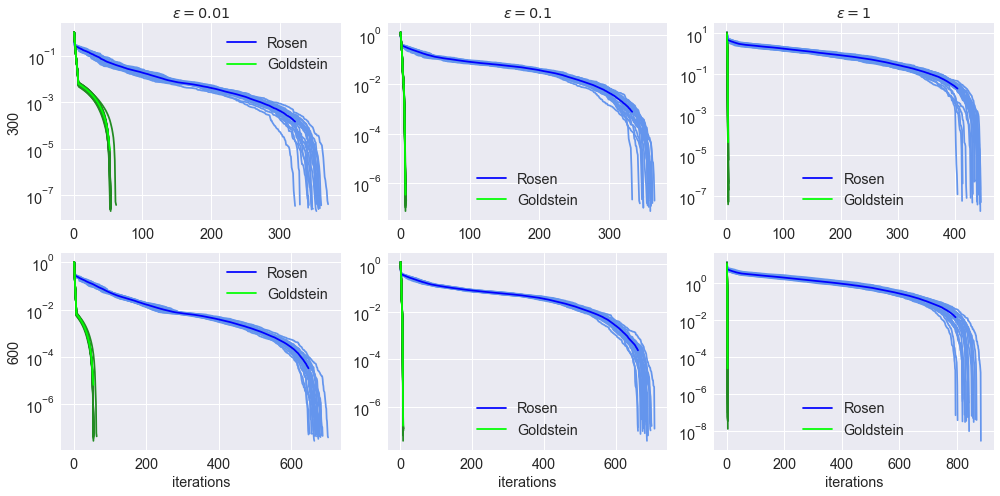

In [11]:
chosen_epsilons = epsilons
chosen_sizes = [300, 600]

fig, axs = plt.subplots(nrows=len(chosen_sizes), ncols=len(chosen_epsilons), figsize=(14,7))
for i,root in enumerate(chosen_epsilons):
    for j,size in enumerate(chosen_sizes):
        ax = axs[j][i]
        
        values_rosen = load_runs(f"./RUNS/CAL/{root}", size, "rosen", nproblems=20)
        values_goldstein =  load_runs(f"./RUNS/CAL/{root}", size, "gold", nproblems=20)
   
        best_values = load_external_solver_values(f"./RUNS/CAL/{root}", size)
        
        values_rosen = [relative_gap(i, opt) for i, opt in zip(values_rosen, best_values)]
        values_goldstein = [relative_gap(i, opt) for i, opt in zip(values_goldstein, best_values)]
        
        plot_multiple_functions(values_rosen, plot_avg=True, ax=ax, label="Rosen")
        plot_multiple_functions(values_goldstein, plot_avg=True, ax=ax, color='forestgreen', col_avg='lime', label="Goldstein")
        ax.set_yscale("log")

        
for ax, size in zip(axs[:,0], chosen_sizes):
    ax.set_ylabel(str(size))
    
for ax, eps in zip(axs[0], [0.01, 0.1, 1]):
    ax.set_title(f"$\epsilon = {eps}$")

for ax in axs[1]:
    ax.set_xlabel("iterations")

plt.tight_layout()

# GRAFICI SEPARATI

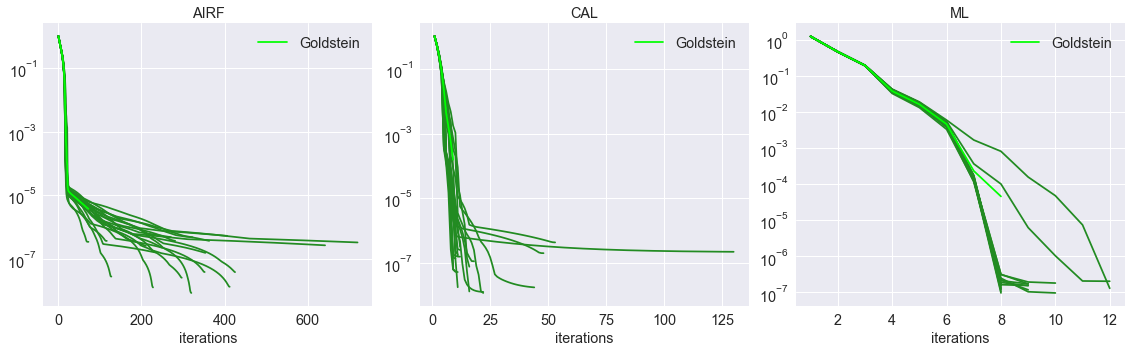

In [12]:
ALG = "GOLD"
size = 600
root = 'C_1EPS01'
datasets = ['ML', 'AIRF', 'CAL']

fig, axs = plt.subplots(ncols=len(datasets), figsize=(16,5))
for i, data in enumerate(datasets):
    ax = axs[i]
          
    values = load_runs(f"./RUNS/{data}/{root}", size, ALG, nproblems=20)

    best_values = load_external_solver_values(f"./RUNS/{data}/{root}", size)

    values = [relative_gap(i, opt) for i, opt in zip(values, best_values)]

    plot_multiple_functions(values, plot_avg=True, ax=ax, color='forestgreen', col_avg='lime', label="Goldstein")
    ax.set_yscale("log")

    
for ax in axs:
    ax.set_xlabel("iterations")

for (ax, title) in zip(axs, rootdataset):
    ax.set_title(title)

plt.tight_layout()

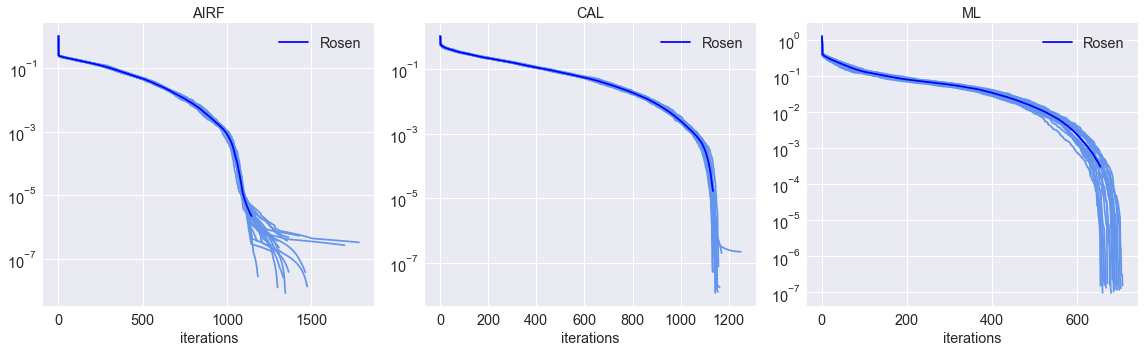

In [13]:
ALG = "ROS"
size = 600
root = 'C_1EPS01'
datasets = ['ML', 'AIRF', 'CAL']

fig, axs = plt.subplots(ncols=len(datasets), figsize=(16,5))
for i, data in enumerate(datasets):
    ax = axs[i]
          
    values = load_runs(f"./RUNS/{data}/{root}", size, ALG, nproblems=20)

    best_values = load_external_solver_values(f"./RUNS/{data}/{root}", size)

    values = [relative_gap(i, opt) for i, opt in zip(values, best_values)]

    plot_multiple_functions(values, plot_avg=True, ax=ax, label="Rosen")
    ax.set_yscale("log")

    
for ax in axs:
    ax.set_xlabel("iterations")

for (ax, title) in zip(axs, rootdataset):
    ax.set_title(title)

plt.tight_layout()

# CONVERGENCE RESULTS

In [14]:
epsilons

['C1EPS_001', 'C1EPS_01', 'C1EPS_1']

In [15]:
size = 600
root = 'C_1EPS01'

In [16]:
upperbounds

['C_01EPS01', 'C_05EPS01', 'C_1EPS01', 'C_2EPS01', 'C_5EPS01', 'C_10EPS01']

In [17]:
gold_values_ml = load_runs(f"./RUNS/ML/{root}", size, "gold", nproblems=20)
ros_values_ml = load_runs(f"./RUNS/ML/{root}", size, "rosen", nproblems=20)
best_values_ml = best_values = load_external_solver_values(f"./RUNS/ML/{root}", size)
gold_conv_rate_ml = convergence_rate(gold_values_ml, best_values_ml)
ros_conv_rate_ml = convergence_rate(ros_values_ml, best_values_ml)

gold_values_airf = load_runs(f"./RUNS/AIRF/{root}", size, "gold", nproblems=20)
ros_values_airf = load_runs(f"./RUNS/AIRF/{root}", size, "rosen", nproblems=20)
best_values_airf = best_values = load_external_solver_values(f"./RUNS/AIRF/{root}", size)
gold_conv_rate_airf = convergence_rate(gold_values_airf, best_values_airf)
ros_conv_rate_airf = convergence_rate(ros_values_airf, best_values_airf)

gold_values_cal = load_runs(f"./RUNS/CAL/{root}", size, "gold", nproblems=20)
ros_values_cal = load_runs(f"./RUNS/CAL/{root}", size, "rosen", nproblems=20)
best_values_cal = best_values = load_external_solver_values(f"./RUNS/CAL/{root}", size)
gold_conv_rate_cal = convergence_rate(gold_values_cal, best_values_cal)
ros_conv_rate_cal = convergence_rate(ros_values_cal, best_values_cal)

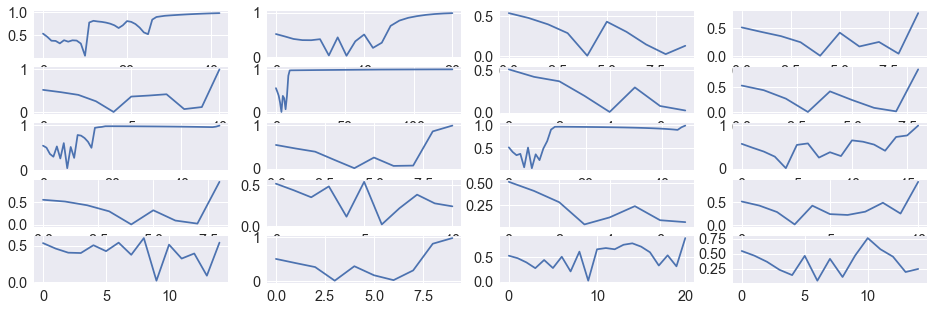

In [18]:
conv = gold_conv_rate_airf

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(16,5))
for i in range(5):
    for j in range(4):
        idx = 4*i + j
        axs[i][j].plot(range(len(conv[idx])), conv[idx])

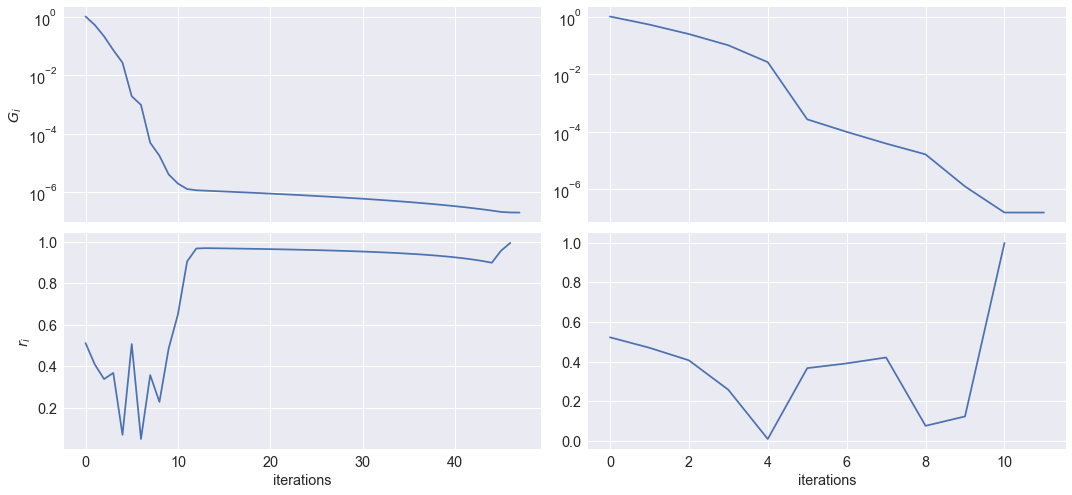

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex="col", figsize=(15,7))
conv = gold_conv_rate_airf
vals = [relative_gap(v, b) for v, b in zip(gold_values_airf, best_values_airf)]
####
idx = 10
axs[0][0].plot(range(len(vals[idx])), vals[idx])
axs[0][0].set_yscale("log")
axs[1][0].plot(range(len(conv[idx])), conv[idx])
####
idx = 4
axs[0][1].plot(range(len(vals[idx])), vals[idx])
axs[0][1].set_yscale("log")
axs[1][1].plot(range(len(conv[idx])), conv[idx])
###
axs[1][0].set_xlabel("iterations")
axs[1][1].set_xlabel("iterations")

axs[0][0].set_ylabel("$G_i$")
axs[1][0].set_ylabel("$r_i$")

plt.tight_layout()

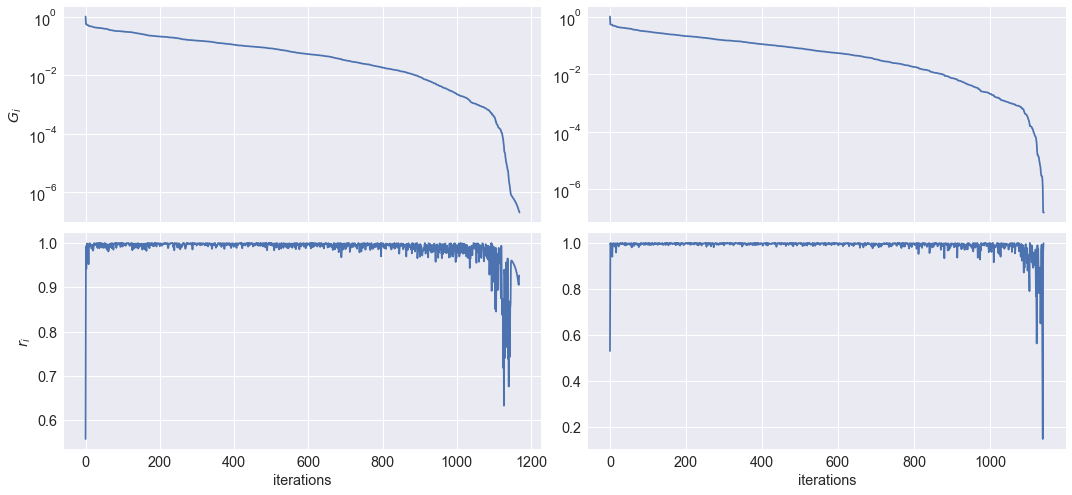

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex="col", figsize=(15,7))
conv = ros_conv_rate_airf
vals = [relative_gap(v, b) for v, b in zip(ros_values_airf, best_values_airf)]
####
idx = 10
axs[0][0].plot(range(len(vals[idx])), vals[idx])
axs[0][0].set_yscale("log")
axs[1][0].plot(range(len(conv[idx])), conv[idx])
####
idx = 4
axs[0][1].plot(range(len(vals[idx])), vals[idx])
axs[0][1].set_yscale("log")
axs[1][1].plot(range(len(conv[idx])), conv[idx])
###
axs[1][0].set_xlabel("iterations")
axs[1][1].set_xlabel("iterations")

axs[0][0].set_ylabel("$G_i$")
axs[1][0].set_ylabel("$r_i$")

plt.tight_layout()

# ALPHAS

In [21]:
def transform_values_alpha(ll, opt):
    new_list = []
    for l in ll:
        new_list.append((l - opt) / np.abs(opt))
    return new_list

In [22]:
basedir = "./RUNS/{}/ALPHA"
nproblems = 5
alphas = [0.1, 0.5, 1, 2, 5]

## CALIFORNIA

In [23]:
california_alphas_path = basedir.format("ML")
# lista di liste di array
# prima lista = alphas
# seconda lista = runs
# array = singola run
a_strings = [str(a).replace(".", "") for a in alphas]
calif_alpha_list = [load_alpha_runs(f"{california_alphas_path}/{a}", 20) for a in a_strings]

In [24]:
calif_alpha_list

[array([array([[   50.        ],
        [ -294.70917485],
        [ -588.44509289],
        [ -839.14527064],
        [-1053.66410604],
        [-1237.77478679],
        [-1396.24579513],
        [-1533.1371726 ],
        [-1651.84053725],
        [-1755.10278353],
        [-1845.29575021],
        [-1924.43722438],
        [-1994.14453141],
        [-2055.75002789],
        [-2110.45033489],
        [-2159.07423746],
        [-2202.40852911],
        [-2241.19659716],
        [-2276.0620876 ],
        [-2307.3763858 ],
        [-2335.51613351],
        [-2360.65706823],
        [-2382.47196267],
        [-2400.07121948],
        [-2412.63836011],
        [-2420.50749445],
        [-2425.02220212],
        [-2427.5994471 ],
        [-2429.17756017],
        [-2430.1379308 ],
        [-2430.73089077],
        [-2431.14170513],
        [-2431.43331081],
        [-2431.67220763],
        [-2431.87519799],
        [-2432.05323182],
        [-2432.21075589],
        [-2432.35733172],
     

In [25]:
#calif_alphas = []
calif_alphas = list(zip(*calif_alpha_list))
calif_alphas = [list(l) for l in calif_alphas]
california_optimal_values = load_external_solver_alphas("./RUNS/ML/ALPHA")

In [26]:
calif_transformed_values = transform_values_alpha(calif_alpha_list, california_optimal_values)

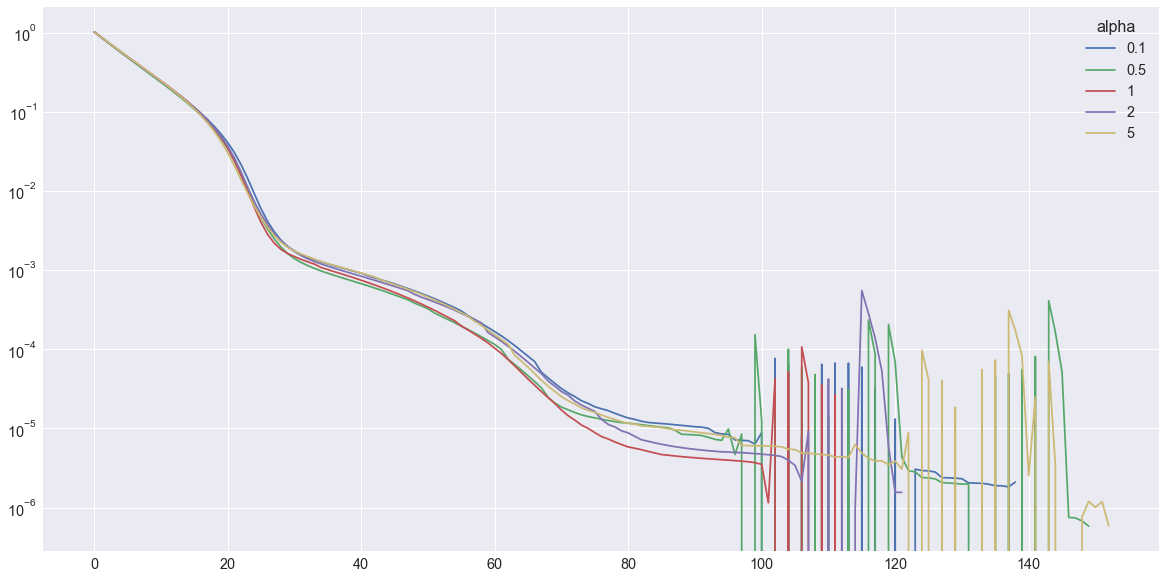

In [27]:
for alpha in range(len(alphas)):
    # (run, alpha)
    plt.plot(calif_transformed_values[0][alpha], label=str(alphas[alpha]))
plt.gca().set_yscale("log")
#plt.gca().set_xlim(0,50)
#plt.gca().set_ylim(1e-3,0)
plt.legend(title="alpha", title_fontsize=16)

In [28]:
for i, a in enumerate(calif_alphas[0]):
    l = [transform_values()]
    plt.plot(a, label=str(alphas[i]))
    print(len(a))
plt.gca().set_xlim(0, 100)
plt.legend(title="alpha", title_fontsize=16)

NameError: name 'transform_values' is not defined

In [ ]:
for i, a in enumerate(calif_alphas[1]):
    plt.plot(a, label=str(alphas[i]))
    
plt.gca().set_xlim(0, 100)
plt.legend(title="alpha", title_fontsize=16)

In [ ]:
for i, a in enumerate(calif_alphas[2]):
    plt.plot(a, label=str(alphas[i]))
    
plt.gca().set_xlim(0, 100)
plt.legend(title="alpha", title_fontsize=16)

In [ ]:
for i, a in enumerate(calif_alphas[3]):
    plt.plot(a, label=str(alphas[i]))
    
plt.gca().set_xlim(0, 100)
plt.legend(title="alpha", title_fontsize=16)

In [ ]:
for i, a in enumerate(calif_alphas[4]):
    plt.plot(a, label=str(alphas[i]))
    
plt.gca().set_xlim(0, 100)
plt.legend(title="alpha", title_fontsize=16)

## ML

In [ ]:
ml_alphas_path = basedir.format("ML")
ml_alphas_path

In [ ]:
ml_alphas_list = [load_alphas(ml_alphas_path, str(a).replace(".", "")) for a in alphas]
ml_alphas = list(zip(*ml_alphas_list))

In [ ]:
for i, a in enumerate(ml_alphas[0]):
    plt.plot(a, label=str(alphas[i]))
    print(len(a))
plt.gca().set_xlim(0, 100)
plt.legend(title="alpha", title_fontsize=16)

In [ ]:
for i, a in enumerate(ml_alphas[1]):
    plt.plot(a, label=str(alphas[i]))
    
plt.gca().set_xlim(0, 100)
plt.legend(title="alpha", title_fontsize=16)

In [ ]:
for i, a in enumerate(ml_alphas[2]):
    plt.plot(a, label=str(alphas[i]))
    
plt.gca().set_xlim(0, 100)
plt.legend(title="alpha", title_fontsize=16)

In [ ]:
for i, a in enumerate(ml_alphas[3]):
    plt.plot(a, label=str(alphas[i]))
    
plt.gca().set_xlim(0, 100)
plt.legend(title="alpha", title_fontsize=16)

In [ ]:
for i, a in enumerate(ml_alphas[4]):
    plt.plot(a, label=str(alphas[i]))
    
plt.gca().set_xlim(0, 100)
plt.legend(title="alpha", title_fontsize=16)

## AIRFOIL

In [ ]:
airf_alphas_path = basedir.format("AIRF")

In [ ]:
airf_alpha_list = [load_alphas(airf_alphas_path, str(a).replace(".", "")) for a in alphas]
airf_alphas = list(zip(*calif_alpha_list))

In [ ]:
for i, a in enumerate(airf_alphas[0]):
    plt.plot(a, label=str(alphas[i]))
    print(len(a))
plt.gca().set_xlim(0, 100)
plt.legend(title="alpha", title_fontsize=16)

In [ ]:
for i, a in enumerate(airf_alphas[1]):
    plt.plot(a, label=str(alphas[i]))
    
plt.gca().set_xlim(0, 100)
plt.legend(title="alpha", title_fontsize=16)

In [ ]:
for i, a in enumerate(airf_alphas[2]):
    plt.plot(a, label=str(alphas[i]))
    
plt.gca().set_xlim(0, 100)
plt.legend(title="alpha", title_fontsize=16)

In [ ]:
for i, a in enumerate(airf_alphas[3]):
    plt.plot(a, label=str(alphas[i]))
    
plt.gca().set_xlim(0, 100)
plt.legend(title="alpha", title_fontsize=16)

In [ ]:
for i, a in enumerate(airf_alphas[4]):
    plt.plot(a, label=str(alphas[i]))
    
plt.gca().set_xlim(0, 100)
plt.legend(title="alpha", title_fontsize=16)

# New epsilon

In [39]:
for root, dirs, files in os.walk("./RUNS2"):
    if root == "./RUNS2\AIRF":
        chosen_epsilons_airf = dirs[:-1]
        print(chosen_epsilons_airf)
    
    if root == "./RUNS2\CAL":
        chosen_epsilons_cal = dirs[:-1]
        print(chosen_epsilons_cal)
    
    if root == "./RUNS2\ML":
        chosen_epsilons_ml = dirs[:-1]
        print(chosen_epsilons_ml)

['C1EPS_[1-24835943]', 'C1EPS_[12-48359428]', 'C1EPS_[24-96718856]', 'C1EPS_[6-24179714]']
['C1EPS_0-020685581690891845', 'C1EPS_0-10342790845445922', 'C1EPS_0-20685581690891844', 'C1EPS_0-4137116338178369']
['C1EPS_0-17168133141590286', 'C1EPS_0-8584066570795144', 'C1EPS_1-7168133141590287', 'C1EPS_3-4336266283180574']


In [54]:
feat, targ = load_california_dataset()
ROOT="./RUNS2/CAL/"
avg_target_cal = sum(targ) / len(targ)
if avg_target_cal < 1e-5:
    avg_target_cal = 1
epsilons_cal = [avg_target_cal * i for i in [0.01, 0.05, 0.1, 0.2]]

C:\Users\lepri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


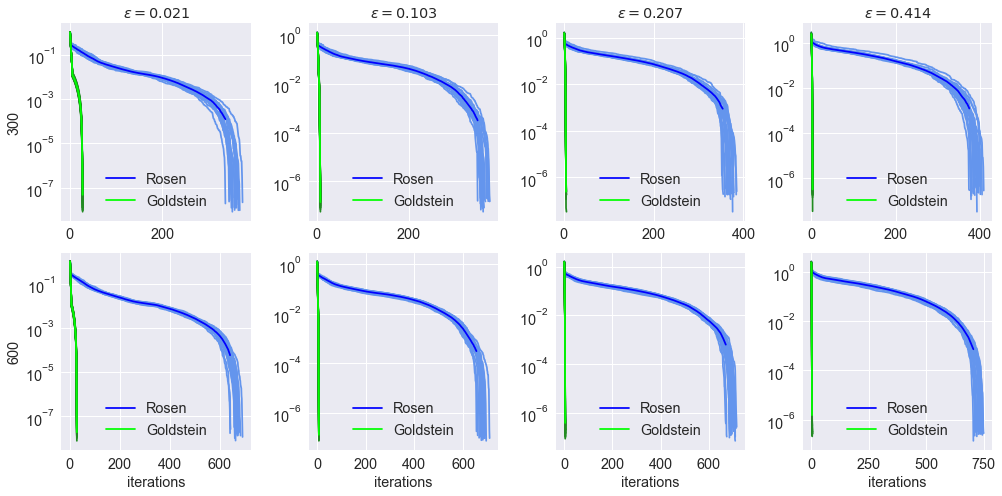

In [56]:
chosen_epsilons = chosen_epsilons_cal
chosen_sizes = [300, 600]

fig, axs = plt.subplots(nrows=len(chosen_sizes), ncols=len(chosen_epsilons), figsize=(14,7))
for i,root in enumerate(chosen_epsilons):
    for j,size in enumerate(chosen_sizes):
        ax = axs[j][i]
        
        values_rosen = load_runs(f"./RUNS2/CAL/{root}", size, "rosen", nproblems=20)
        values_goldstein =  load_runs(f"./RUNS2/CAL/{root}", size, "gold", nproblems=20)
   
        best_values = load_external_solver_values(f"./RUNS2/CAL/{root}", size)
        
        values_rosen = [relative_gap(i, opt) for i, opt in zip(values_rosen, best_values)]
        values_goldstein = [relative_gap(i, opt) for i, opt in zip(values_goldstein, best_values)]
        
        plot_multiple_functions(values_rosen, plot_avg=True, ax=ax, label="Rosen")
        plot_multiple_functions(values_goldstein, plot_avg=True, ax=ax, color='forestgreen', col_avg='lime', label="Goldstein")
        ax.set_yscale("log")

        
for ax, size in zip(axs[:,0], chosen_sizes):
    ax.set_ylabel(str(size))
    
for ax, eps in zip(axs[0], epsilons_cal):
    ax.set_title(f"$\epsilon = {round(eps,3)}$")

for ax in axs[1]:
    ax.set_xlabel("iterations")

plt.tight_layout()

In [59]:
feat, targ = load_airfoil_dataset()
targ = targ.flatten()
ROOT="./RUNS2/AIRF/"
avg_target_airf = sum(targ) / len(targ)
if avg_target_airf < 1e-5:
    avg_target_airf = 1
epsilons_airf = [avg_target_airf * i for i in [0.01, 0.05, 0.1, 0.2]]

C:\Users\lepri\OneDrive\Desktop\ProgettoML\cm\data/airfoil_self_noise.csv


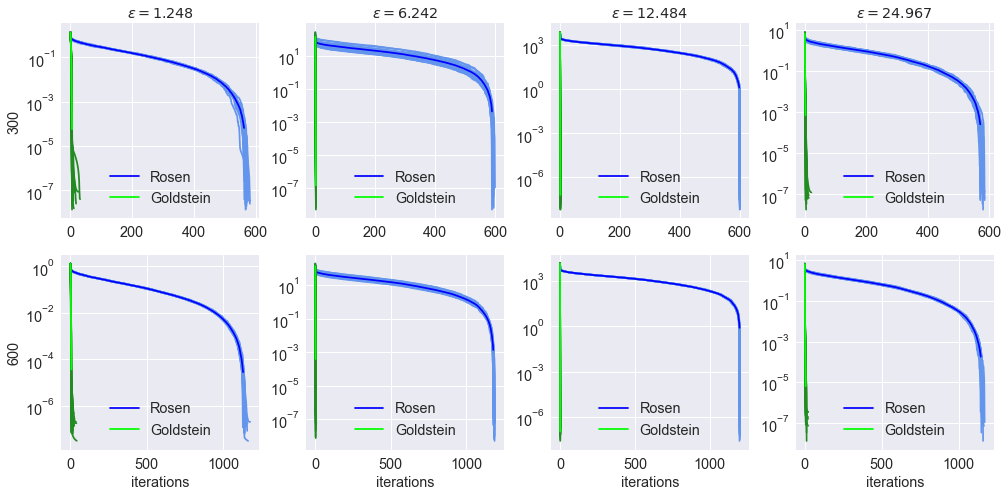

In [60]:
chosen_epsilons = chosen_epsilons_airf
chosen_sizes = [300, 600]

fig, axs = plt.subplots(nrows=len(chosen_sizes), ncols=len(chosen_epsilons), figsize=(14,7))
for i,root in enumerate(chosen_epsilons):
    for j,size in enumerate(chosen_sizes):
        ax = axs[j][i]
        
        values_rosen = load_runs(f"./RUNS2/AIRF/{root}", size, "rosen", nproblems=20)
        values_goldstein =  load_runs(f"./RUNS2/AIRF/{root}", size, "gold", nproblems=20)
   
        best_values = load_external_solver_values(f"./RUNS2/AIRF/{root}", size)
        
        values_rosen = [relative_gap(i, opt) for i, opt in zip(values_rosen, best_values)]
        values_goldstein = [relative_gap(i, opt) for i, opt in zip(values_goldstein, best_values)]
        
        plot_multiple_functions(values_rosen, plot_avg=True, ax=ax, label="Rosen")
        plot_multiple_functions(values_goldstein, plot_avg=True, ax=ax, color='forestgreen', col_avg='lime', label="Goldstein")
        ax.set_yscale("log")

        
for ax, size in zip(axs[:,0], chosen_sizes):
    ax.set_ylabel(str(size))
    
for ax, eps in zip(axs[0], epsilons_airf):
    ax.set_title(f"$\epsilon = {round(eps, 3)}$")

for ax in axs[1]:
    ax.set_xlabel("iterations")

plt.tight_layout()

In [50]:
feat, targ = load_ml_dataset()
t1 = targ[:,0]
t2 = targ[:,1]
targ = t1
ROOT="./RUNS2/ML/"
avg_target_ml = sum(targ) / len(targ)

if avg_target_ml < 1e-5:
    avg_target_ml = 1
    
epsilons_ml = [avg_target_ml * i for i in [0.01, 0.05, 0.1, 0.2]]

loading from: 
C:\Users\lepri\OneDrive\Desktop\ProgettoML\cm\data/ML-CUP19-TR.csv


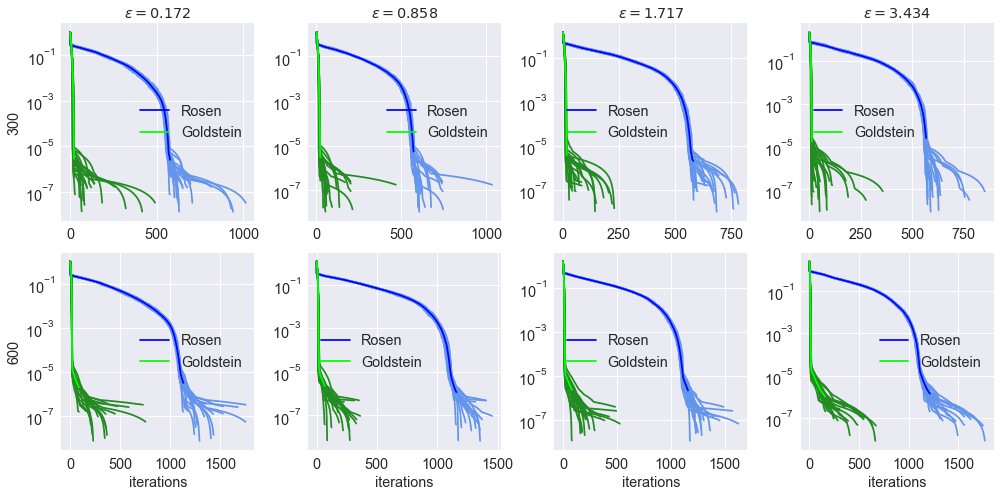

In [53]:
chosen_epsilons = chosen_epsilons_ml
chosen_sizes = [300, 600]

fig, axs = plt.subplots(nrows=len(chosen_sizes), ncols=len(chosen_epsilons), figsize=(14,7))
for i,root in enumerate(chosen_epsilons):
    for j,size in enumerate(chosen_sizes):
        ax = axs[j][i]
        
        values_rosen = load_runs(f"./RUNS2/ML/{root}", size, "rosen", nproblems=20)
        values_goldstein =  load_runs(f"./RUNS2/ML/{root}", size, "gold", nproblems=20)
   
        best_values = load_external_solver_values(f"./RUNS2/ML/{root}", size)
        
        values_rosen = [relative_gap(i, opt) for i, opt in zip(values_rosen, best_values)]
        values_goldstein = [relative_gap(i, opt) for i, opt in zip(values_goldstein, best_values)]
        
        plot_multiple_functions(values_rosen, plot_avg=True, ax=ax, label="Rosen")
        plot_multiple_functions(values_goldstein, plot_avg=True, ax=ax, color='forestgreen', col_avg='lime', label="Goldstein")
        ax.set_yscale("log")

        
for ax, size in zip(axs[:,0], chosen_sizes):
    ax.set_ylabel(str(size))
    
for ax, eps in zip(axs[0], epsilons_ml):
    ax.set_title(f"$\epsilon = {round(eps, 3)}$")

for ax in axs[1]:
    ax.set_xlabel("iterations")

plt.tight_layout()

# Real Problems

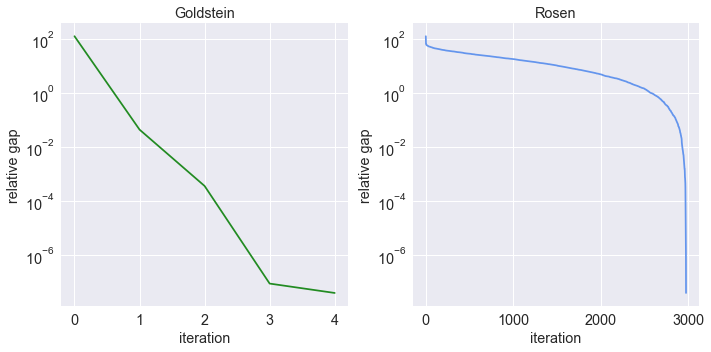

In [75]:
airf_gold = pd.read_csv("./AIRFOIL_GOLDSTEIN_C1.csv", usecols=['val']).to_numpy()
airf_ros = pd.read_csv("./AIRFOIL_ROSEN_C1.csv", usecols=['val']).to_numpy()

airf_opt = None
with open("./AIRFOIL_C1_optimalvalue.txt", "r") as f:
    airf_opt = np.float64(f.readlines()[0])

airf_gold_rg = relative_gap(airf_gold, airf_opt)
airf_ros_rg = relative_gap(airf_ros, airf_opt)


fig, axs = plt.subplots(ncols=2, figsize=(10,5))

axs[0].plot(airf_gold_rg, color='forestgreen', label="goldstein")
axs[1].plot(airf_ros_rg, color='cornflowerblue', label="rosen")
axs[0].set(yscale='log', xlabel='iteration', ylabel="relative gap", title="Goldstein")
axs[1].set(yscale='log', xlabel='iteration', ylabel="relative gap", title="Rosen")

plt.tight_layout()

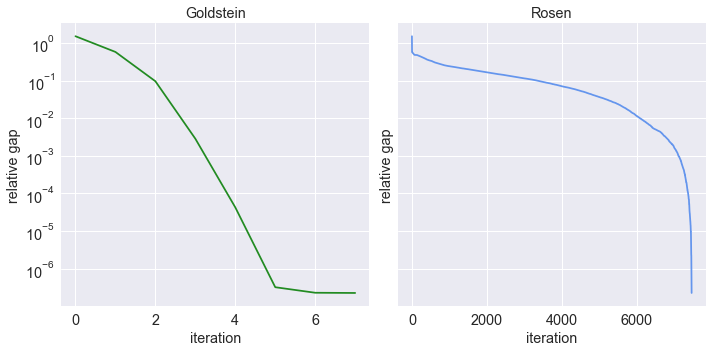

In [77]:
cal_gold = pd.read_csv("./CALIF_GOLDSTEIN_C1.csv", usecols=['val']).to_numpy()
cal_ros = pd.read_csv("./CALIF_ROSEN_C1.csv", usecols=['val']).to_numpy()

cal_opt = None
with open("./CALIF_C1_optimalvalue.txt", "r") as f:
    cal_opt = np.float64(f.readlines()[0])

cal_gold_rg = relative_gap(cal_gold, cal_opt)
cal_ros_rg = relative_gap(cal_ros, cal_opt)

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(10,5))

axs[0].plot(cal_gold_rg, color='forestgreen', label="goldstein")
axs[1].plot(cal_ros_rg, color='cornflowerblue', label="rosen")
axs[0].set(yscale='log', xlabel='iteration', ylabel="relative gap", title="Goldstein")
axs[1].set(yscale='log', xlabel='iteration', ylabel="relative gap", title="Rosen")

plt.tight_layout()